In [1]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

# Step 1 Understand Business Requirements & Nature of Data

# Step 2 Classify the problem as supervids/unsupervised & regression/classification

## Loaa Functions and Evaluation Metric

# Step 3 Download, clean and explore the data and create new features

In [2]:
ross_df=pd.read_csv(r'C:\Users\User\MachineLearning\Project_course\HowToAproachMLP\train.csv', low_memory=False)

In [3]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
store_df= pd.read_csv(r"C:\Users\User\MachineLearning\Project_course\HowToAproachMLP\store.csv")

In [5]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [6]:
merged_df=ross_df.merge(store_df,how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
merged_df.shape

(1017209, 18)

In [8]:
test_df=pd.read_csv(r"C:\Users\User\MachineLearning\Project_course\HowToAproachMLP\test.csv")

In [9]:
merged_test_df=test_df.merge(store_df, how='left', on='Store')

In [10]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Cleaning Data

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [12]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [13]:
merged_df.duplicated().sum()

0

In [14]:
merged_df['Date']=pd.to_datetime(merged_df.Date)

In [15]:
merged_test_df['Date']=pd.to_datetime(merged_test_df.Date)

In [16]:
merged_df.Date.min(),merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [17]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## Exploratory Data Analysis and Visualization 

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sales', ylabel='Count'>

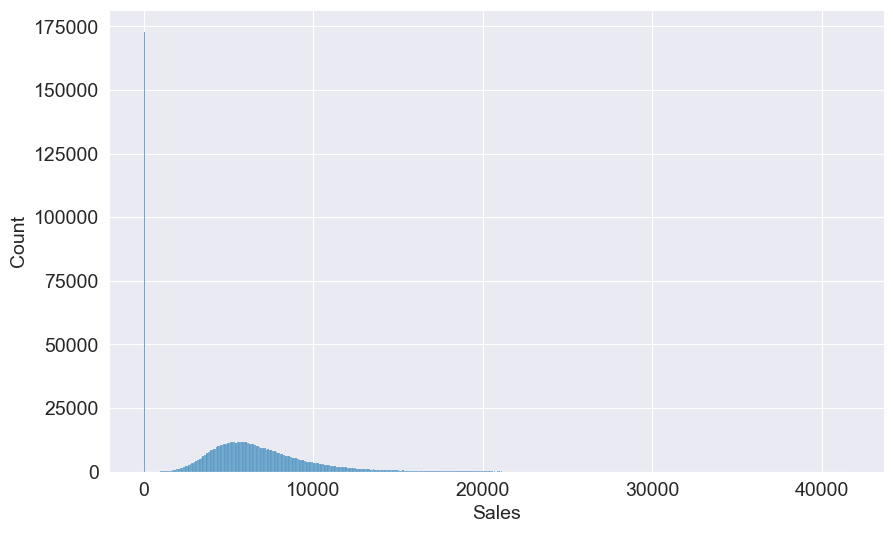

In [20]:
sns.histplot(data=merged_df, x='Sales')

In [21]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [22]:
merged_df.Sales.value_counts()[0]

172871

In [23]:
merged_df=merged_df[merged_df.Open==1].copy()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


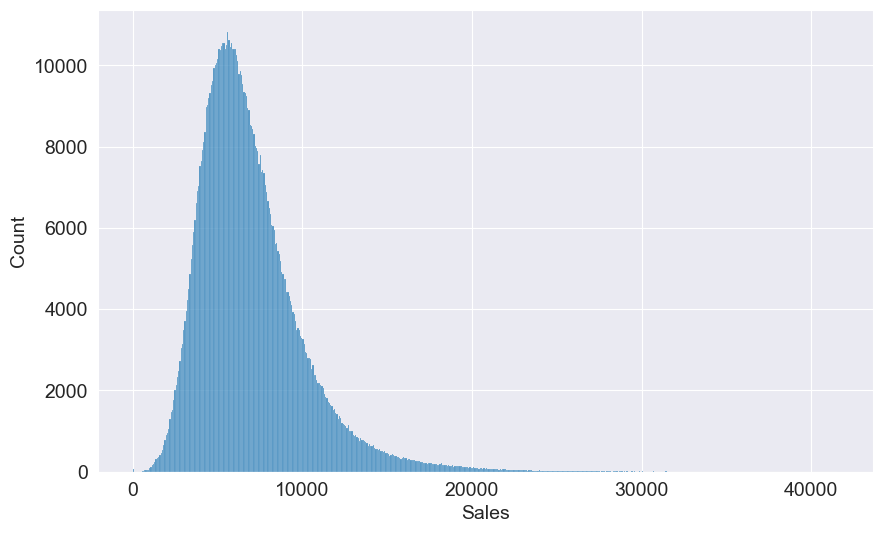

In [24]:
sns.histplot(data=merged_df, x='Sales');

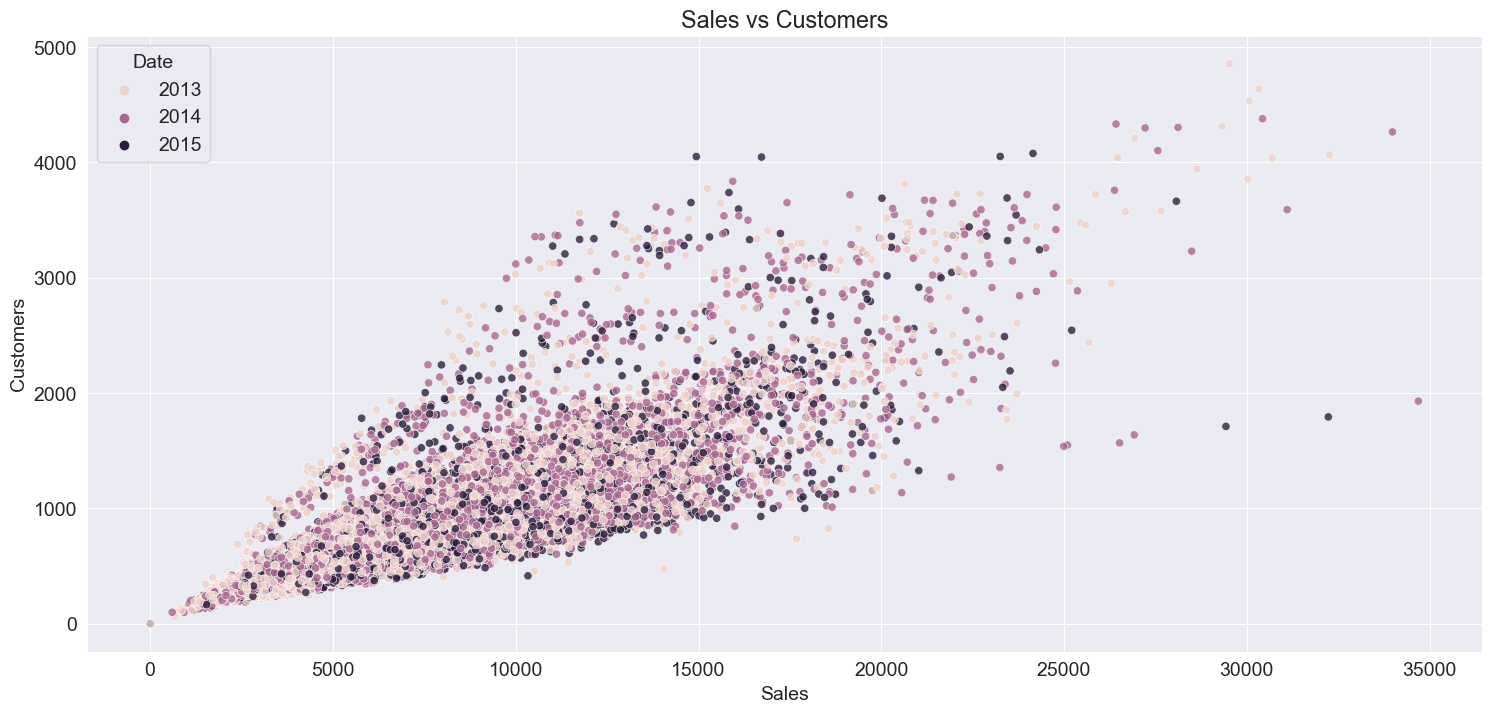

In [25]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year,alpha=0.8)
plt.title('Sales vs Customers')
plt.show()

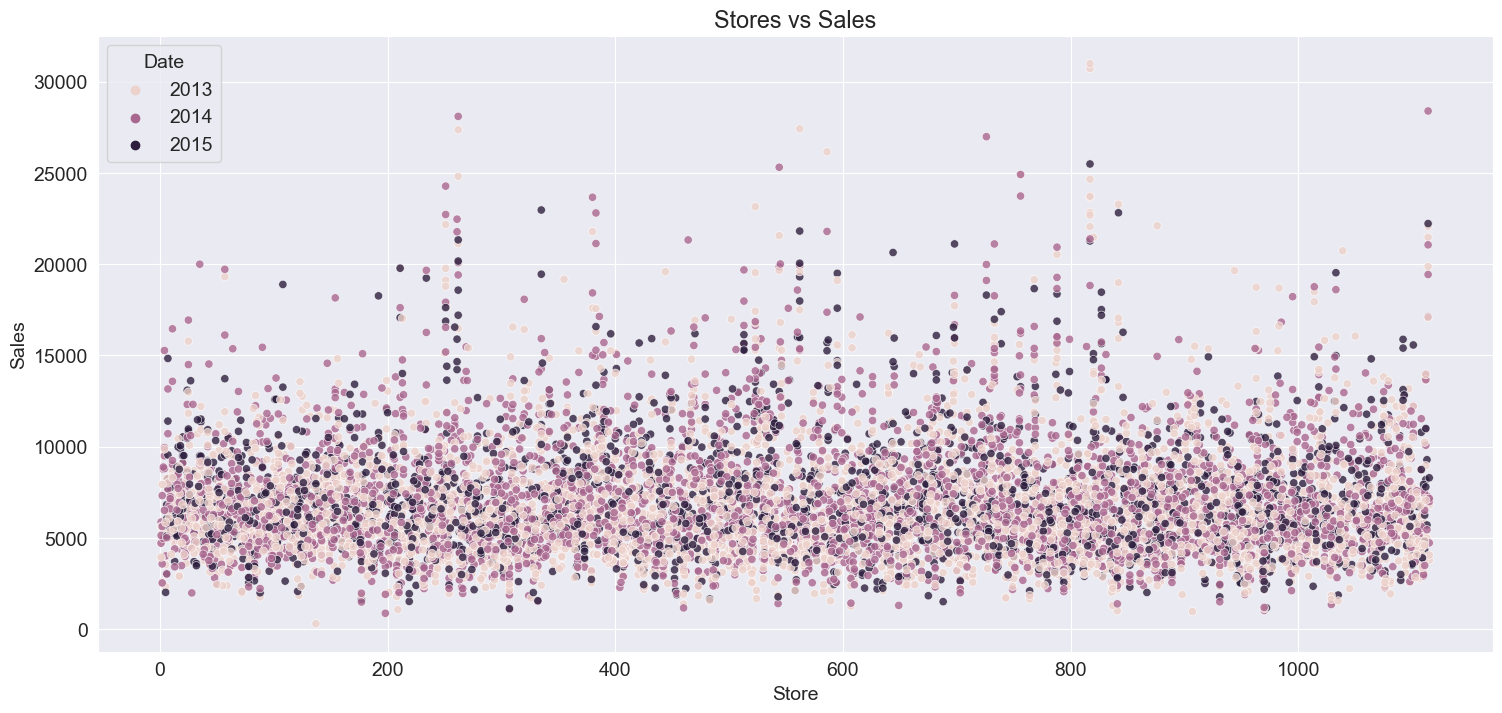

In [26]:
plt.figure(figsize=(18,8))
temp_df=merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores vs Sales")
plt.show()

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

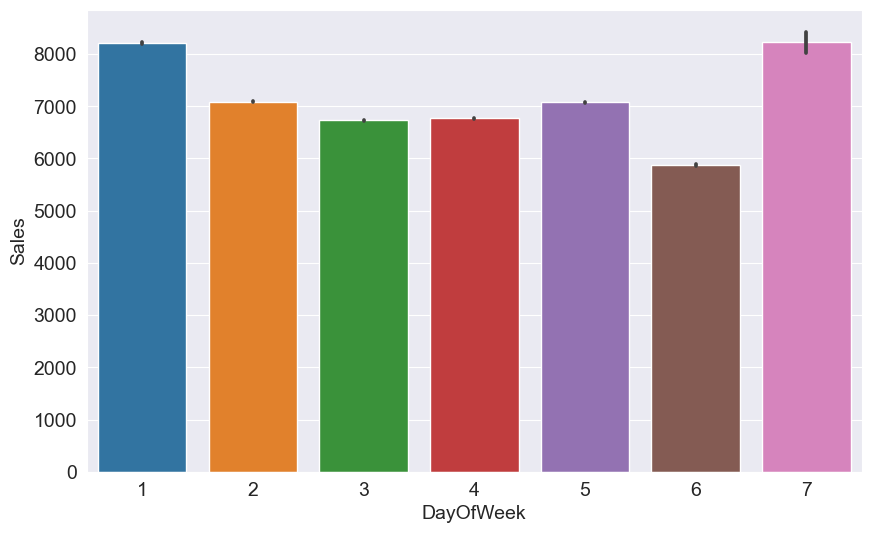

In [27]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales')

<Axes: xlabel='Promo', ylabel='Sales'>

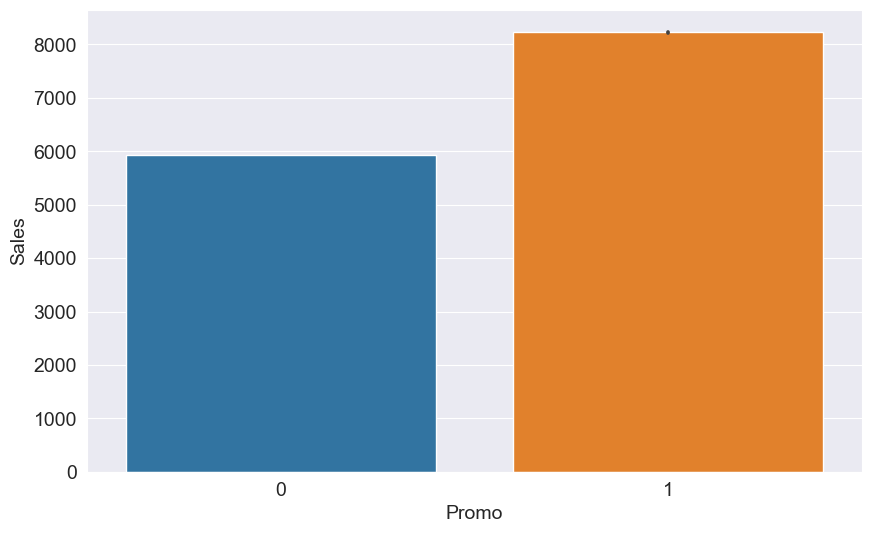

In [28]:
sns.barplot(data=merged_df, x='Promo', y='Sales')

In [29]:
merged_df.corr()['Sales'].sort_values(ascending=False)

ValueError: could not convert string to float: 'a'

## Feature Engineering

In [30]:
merged_df['Day']= merged_df.Date.dt.day
merged_df['Month']= merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [31]:
merged_test_df['Day']= merged_test_df.Date.dt.day
merged_test_df['Month']= merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

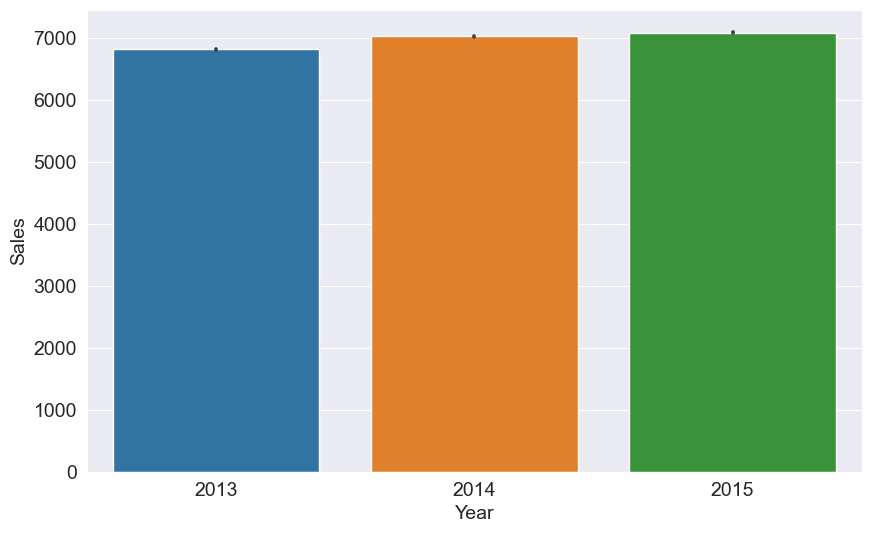

In [32]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

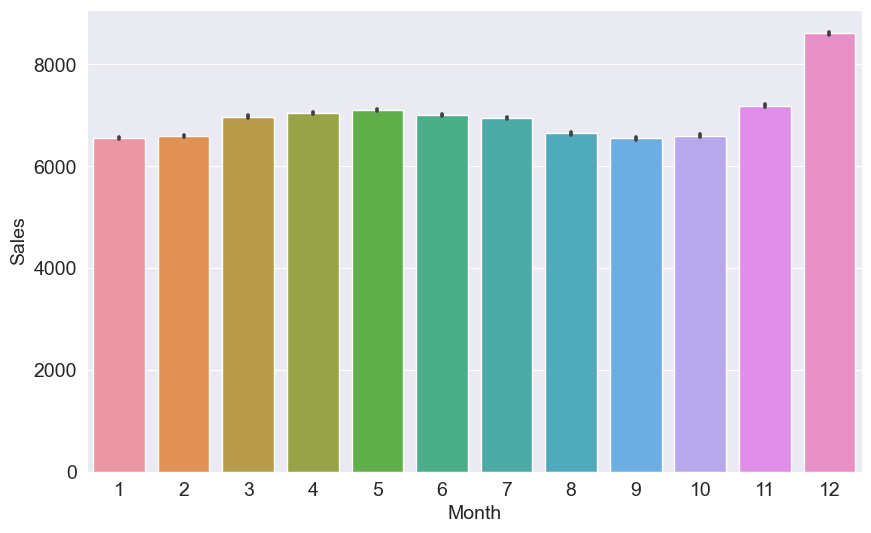

In [33]:
sns.barplot(data=merged_df, x='Month', y='Sales')

# Step 4 -Create a trainig/test/valiadation split and prepare the data for training

## Train/test/Validation Split

In [34]:
len(merged_df)

844392

In [35]:
train_size=int(.75*len(merged_df))
train_size

633294

In [36]:
sorted_df=merged_df.sort_values('Date')
train_df, val_df=sorted_df[:train_size], sorted_df[train_size:]

In [37]:
len(train_df), len(val_df)

(633294, 211098)

In [38]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,b,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,b,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,c,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,c,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [39]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [40]:
val_df.Date.min(),val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [41]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [42]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,b,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,a,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,b,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,a,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,b,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,a,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,c,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,c,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,c,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


In [43]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

### Input and Targets columns

In [44]:
input_cols=['Store','DayOfWeek','Promo','StateHoliday','StoreType','Assortment','Day','Month','Year']

In [45]:
target_col='Sales'

In [46]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [47]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

In [48]:
val_inputs=val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [49]:
test_inputs=merged_test_df[input_cols]

In [50]:
numeric_cols=['Store','Day','Month','Year']
categorical_cols=['DayOfWeek','Promo','StateHoliday','StoreType','Assortment']

### Imputation, Scaling and Encode

In [51]:
from sklearn.impute import SimpleImputer

In [52]:
imputer=SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])

In [53]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])

C:\Users\User\AppData\Local\Temp\ipykernel_6852\1772424682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])


lets also scale the values to the (0,1) range

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [56]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

C:\Users\User\AppData\Local\Temp\ipykernel_6852\443320887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])


Encode categorical columns as one-hot vectors

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit (train_inputs[categorical_cols])
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))

In [59]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

C:\Users\User\AppData\Local\Temp\ipykernel_6852\2318466707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])
C:\Users\User\AppData\Local\Temp\ipykernel_6852\2318466707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])
C:\Users\User\AppData\Local\Temp\ipykernel_6852\2318466707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

Lets now extract out the numeric data

In [60]:
x_train=train_inputs[numeric_cols+encoded_cols]
x_val=val_inputs[numeric_cols+encoded_cols]
x_test=test_inputs[numeric_cols+encoded_cols]

# Step5 - Create quick and easy baseline models to benchmark future models

## Fixed/ Random Guess

In [61]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [62]:
train_preds=return_mean(x_train)

In [63]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

Lets evaluate this to using the RMSE score

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
mean_squared_error(train_preds, train_targets, squared=False)

3082.450443277419

In [66]:
mean_squared_error(return_mean(x_val),val_targets, squared=False)

3168.6033635047716

The model is off by about $3000 on average

Lets try another model, which makes a radom guess between the lowest  and highest sale.

In [67]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(),merged_df.Sales.max()
    return np.random.random(len(inputs))*(hi-lo)+lo

In [68]:
train_preds=guess_random(x_train)
train_preds

array([40821.39395861,  4256.15261601, 30918.33706798, ...,
       23961.9570351 ,  9858.61165311,  8082.05290547])

In [69]:
mean_squared_error(train_preds, train_targets, squared=False)

18611.1698207789

In [70]:
mean_squared_error(guess_random(x_val),val_targets, squared=False)

18395.29793156407

Clearly, this model is much worse

## Baseline ML model

Lets trian a simple LinearRegression model , with no  customization 

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linreg=LinearRegression()

In [73]:
linreg.fit(x_train, train_targets)

LinearRegression()

In [74]:
train_preds= linreg.predict(x_train)
train_preds

array([ 7152., 10612.,  7070., ...,  6240.,  5998.,  5624.])

In [75]:
mean_squared_error(train_preds, train_targets, squared=False)

2741.598913238973

In [77]:
val_preds=linreg.predict(x_val)
val_preds

array([5624., 5624., 5998., ..., 8646., 8404., 7836.])

In [78]:
mean_squared_error(val_preds, val_targets, squared=False)

2818.1255835290626

# Step 6 -Pick a strategy, train a model  and tune hyperparameters

In [84]:
def try_model(model):
    #Fit the model
    model.fit(x_train, train_targets)
    #Generate predictions
    train_preds= model.predict(x_train)
    val_preds= model.predict(x_val)
    # Compute RMSE
    train_rmse=mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse=mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

### Linear Models

In [81]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [86]:
try_model(LinearRegression())

(2741.598913238973, 2818.1255835290626)

In [87]:
try_model(Ridge())

(2741.5871950814444, 2817.778466540934)

In [89]:
try_model(Lasso())

(2741.7143904640566, 2817.9472924045217)

In [90]:
try_model(SGDRegressor())

(2742.0862793026436, 2825.30064258472)

In [92]:
try_model(ElasticNet(alpha=0.6))

(2843.6585896792467, 2935.862100049394)

### Tree based Models

In [94]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [95]:
tree= DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1559.7378600480247)

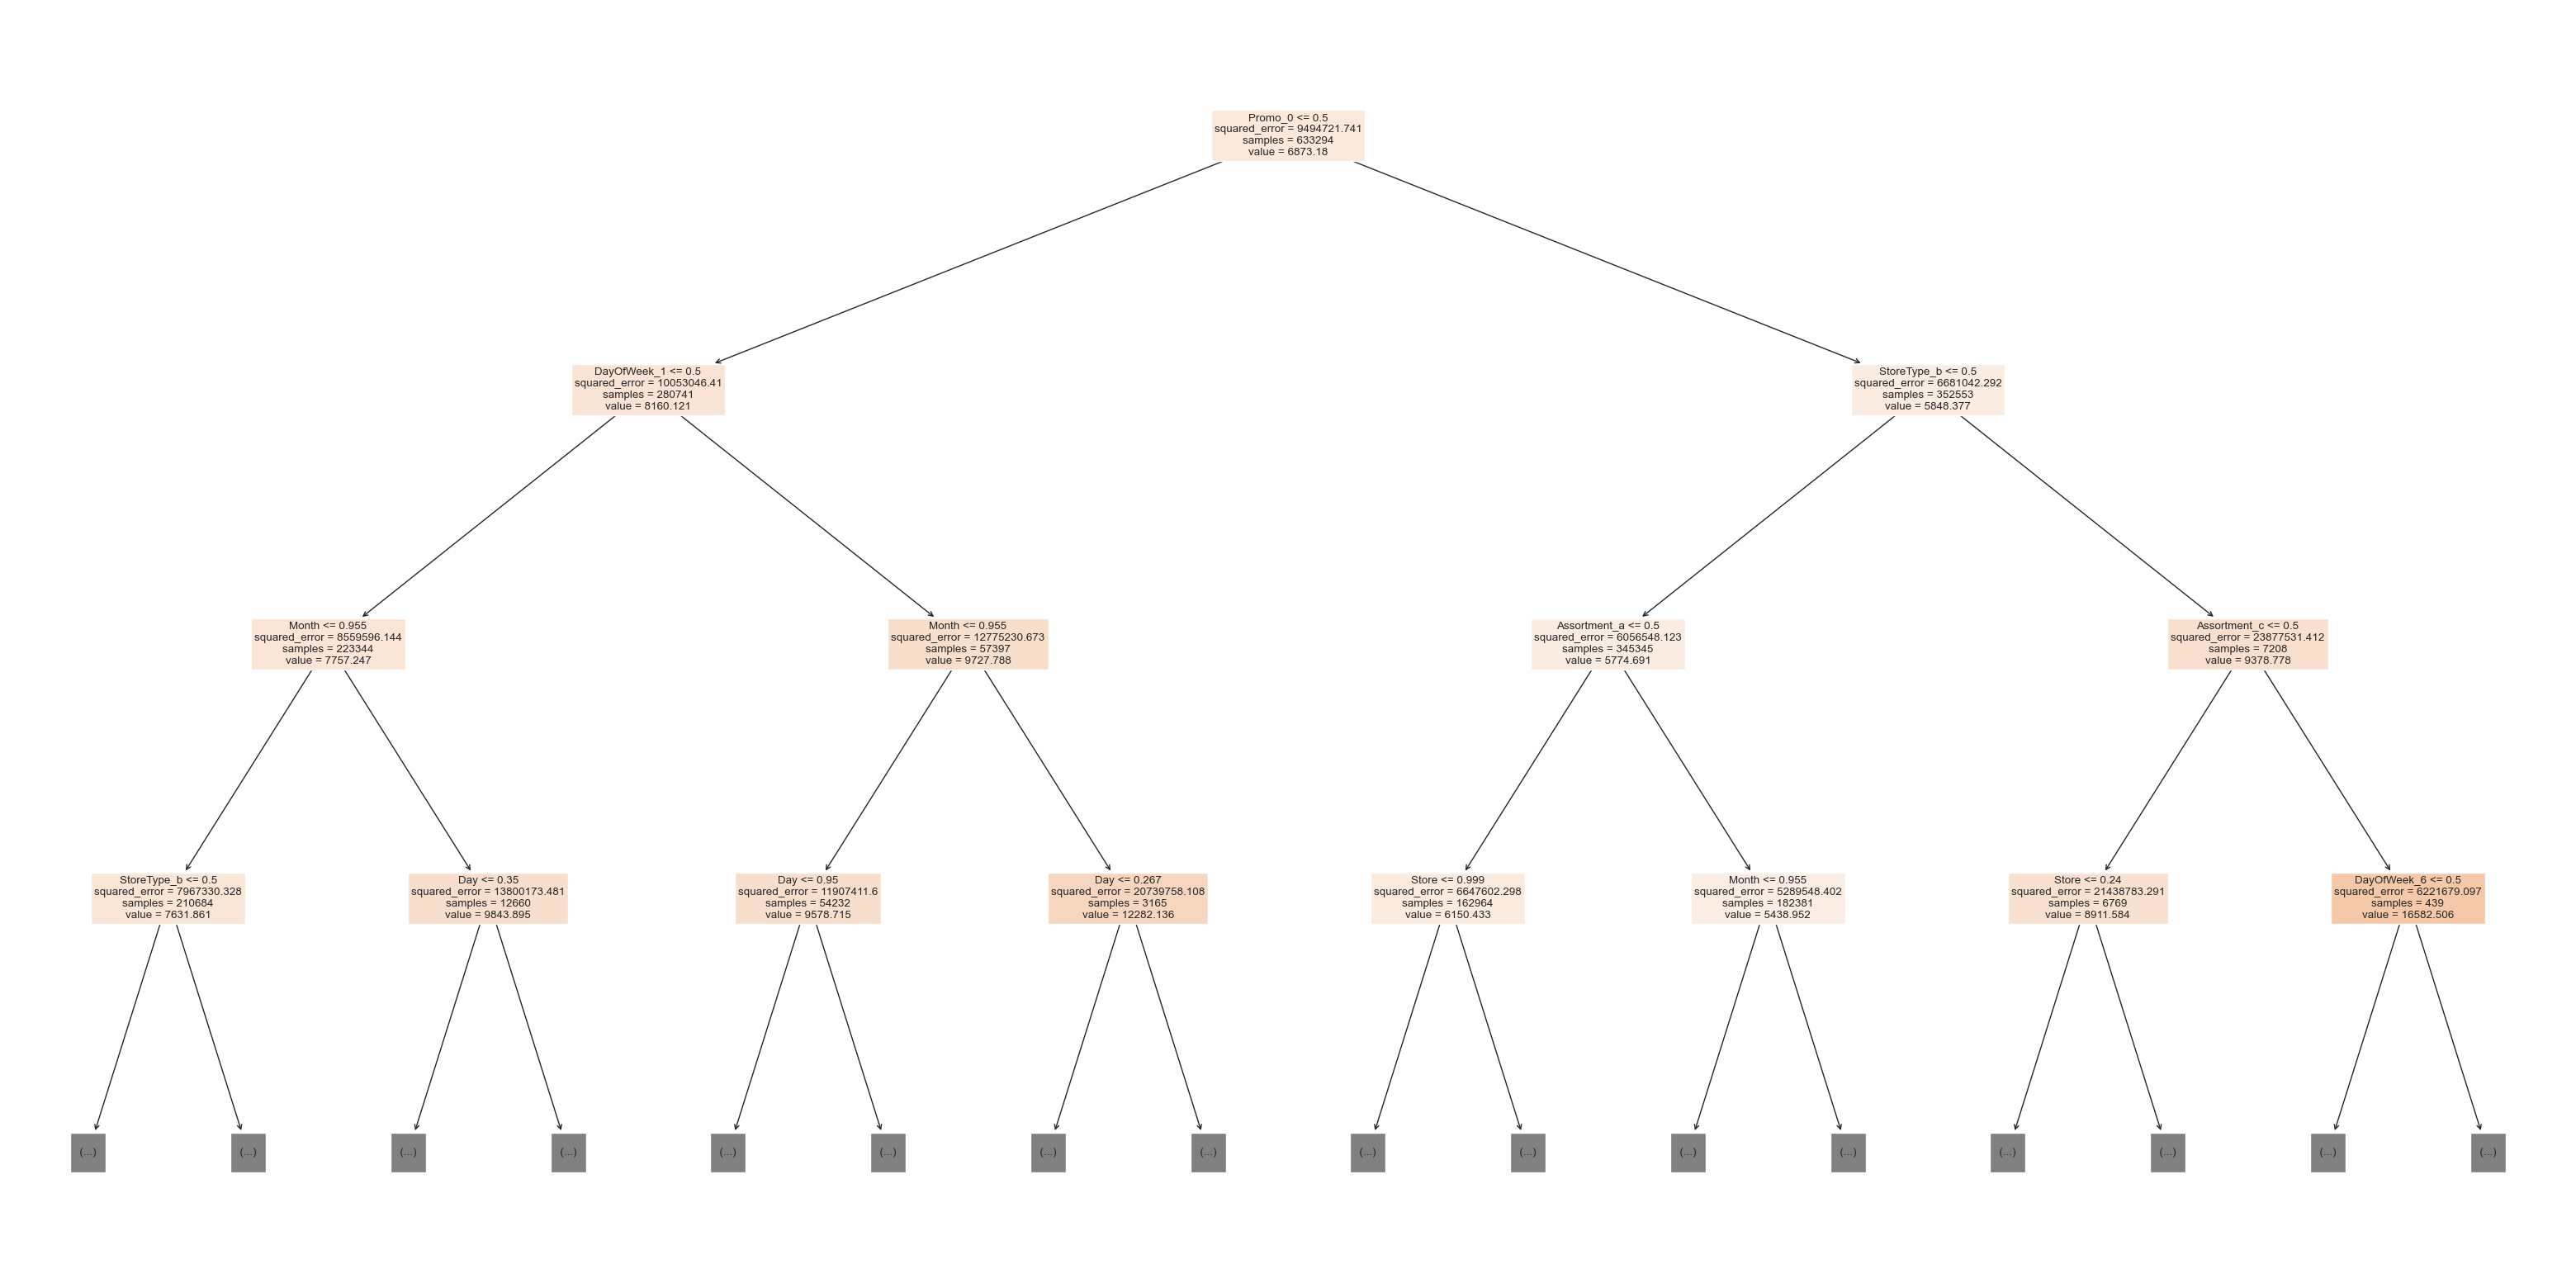

In [96]:
plt.figure(figsize=(40,20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

Lets try a random forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
%%time
rf=RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

CPU times: total: 10min 12s
Wall time: 58.8 s


(474.9198974666898, 1371.7321923469985)